# Library import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')
from matplotlib.ticker import FuncFormatter
import requests
import os
import json
import seaborn as sns

# Function definition

In [2]:
# # def read_and_process_data(file_path, date_columns, date_format, group_by_cols=None, agg_dict=None, filter_columns=None, filter_values=None):
# #     """
# #     Lee y procesa datos desde un archivo CSV o JSON.

# #     Parámetros:
# #     file_path (str): Ruta al archivo CSV o JSON.
# #     date_columns (list): Lista de columnas de fecha.
# #     date_format (str): Formato de la fecha.
# #     group_by_cols (list, opcional): Columnas para agrupar.
# #     agg_dict (dict, opcional): Diccionario de agregación.
# #     filter_columns (list, opcional): Columnas para filtrar.
# #     filter_values (list, opcional): Valores para filtrar.

# #     Retorna:
# #     pd.DataFrame: DataFrame de pandas procesado.
# #     """
# #     # Determinar el tipo de archivo y leer los datos
# #     if file_path.endswith('.csv'):
# #         data = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
# #     elif file_path.endswith('.json'):
# #         with open(file_path, 'r', encoding='utf-8') as file:
# #             json_data = json.load(file)

# #         # Convertir los datos JSON a un DataFrame de pandas
# #         rows = []
# #         for entry in json_data:
# #             for dato in entry['datos']:
# #                 rows.append({
# #                     'latitud': entry['latitud'],
# #                     'longitud': entry['longitud'],
# #                     'nombre': entry['nombre'],
# #                     'nombreCorto': entry['nombreCorto'],
# #                     'codigoSerial': entry['codigoSerial'],
# #                     'variableConsulta': dato['variableConsulta'],
# #                     'fecha': dato['fecha'],
# #                     'calidad': dato['calidad'],
# #                     'valor': dato['valor']
# #                 })

# #         data = pd.DataFrame(rows)
# #     else:
# #         raise ValueError("El archivo debe ser un CSV o JSON.")

# #     # Convertir la columna de fecha a un objeto datetime
# #     data['date'] = pd.to_datetime(data[date_columns[0]], format=date_format)

# #     # Extraer año y mes de la columna de fecha
# #     data['year'] = data['date'].dt.year
# #     data['month'] = data['date'].dt.month

# #     data = data[data['date'] >= '2015-01-01']

# #     # Filtrar los datos si se proporcionan filter_columns y filter_values
# #     if filter_columns and filter_values:
# #         for filter_column, filter_value in zip(filter_columns, filter_values):
# #             data = data[data[filter_column] == filter_value]

# #     # Agrupar por las columnas especificadas si se proporciona group_by_cols
# #     if group_by_cols:
# #         for (key,value) in zip(agg_dict.keys(),agg_dict.values()):
# #             if value != 'count':
# #                 data[key] = data[key].astype(float)
                
# #         data = data.groupby(group_by_cols).agg(agg_dict).reset_index()

# #     if 'date' in data.columns:
# #         # Ordenar el DataFrame por fecha
# #         data = data.sort_values(by='date')
# #     else:
# #         # Ordenar el DataFrame por año
# #         data = data.sort_values(by='year')

# #     return data

# def read_and_process_data(file_path, date_columns, date_format, group_by_cols=None, agg_dict=None, filter_columns=None, filter_values=None, structure=1):
#     """
#     Lee y procesa datos desde un archivo CSV o JSON.

#     Parámetros:
#     file_path (str): Ruta al archivo CSV o JSON.
#     date_columns (list): Lista de columnas de fecha.
#     date_format (str): Formato de la fecha.
#     group_by_cols (list, opcional): Columnas para agrupar.
#     agg_dict (dict, opcional): Diccionario de agregación.
#     filter_columns (list, opcional): Columnas para filtrar.
#     filter_values (list, opcional): Valores para filtrar.
#     structure (int, opcional): Estructura del archivo JSON (1 para la estructura actual, 2 para la nueva estructura).

#     Retorna:
#     pd.DataFrame: DataFrame de pandas procesado.
#     """
#     # Determinar el tipo de archivo y leer los datos
#     if file_path.endswith('.csv'):
#         data = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
#     elif file_path.endswith('.json'):
#         with open(file_path, 'r', encoding='utf-8') as file:
#             json_data = json.load(file)

#         rows = []
#         if structure == 1:
#             for entry in json_data:
#                 for dato in entry['datos']:
#                     rows.append({
#                         'latitud': entry['latitud'],
#                         'longitud': entry['longitud'],
#                         'nombre': entry['nombre'],
#                         'nombreCorto': entry['nombreCorto'],
#                         'codigoSerial': entry['codigoSerial'],
#                         'variableConsulta': dato['variableConsulta'],
#                         'fecha': dato['fecha'],
#                         'calidad': dato['calidad'],
#                         'valor': dato['valor']
#                     })
#         elif structure == 2:
#             for entry in json_data:
#                 for dato in entry['datos']:
#                     for subdato in dato['datos']:
#                         rows.append({
#                             'latitud': entry['latitud'],
#                             'subcuenca': entry['subcuenca'],
#                             'ciudad': entry['ciudad'],
#                             'fecha': dato['fecha'],
#                             'variableConsulta': subdato['variableConsulta'],
#                             'calidad': subdato['calidad'],
#                             'valor': subdato['valor'],
#                             'nombre': entry['nombre'],
#                             'codigo': entry['codigo'],
#                             'longitud': entry['longitud']
#                         })
#         else:
#             raise ValueError("Estructura no soportada.")

#         data = pd.DataFrame(rows)
#     else:
#         raise ValueError("El archivo debe ser un CSV o JSON.")

#     # Convertir la columna de fecha a un objeto datetime
#     data['date'] = pd.to_datetime(data[date_columns[0]], format=date_format)

#     # Extraer año y mes de la columna de fecha
#     data['year'] = data['date'].dt.year
#     data['month'] = data['date'].dt.month

#     data = data[data['date'] >= '2015-01-01']

#     # Filtrar los datos si se proporcionan filter_columns y filter_values
#     if filter_columns and filter_values:
#         for filter_column, filter_value in zip(filter_columns, filter_values):
#             data = data[data[filter_column] == filter_value]

#     # Agrupar por las columnas especificadas si se proporciona group_by_cols
#     if group_by_cols:
#         for (key,value) in zip(agg_dict.keys(),agg_dict.values()):
#             if value != 'count':
#                 data[key] = data[key].astype(float)

#         data = data.groupby(group_by_cols).agg(agg_dict).reset_index()

#     if 'date' in data.columns:
#         # Ordenar el DataFrame por fecha
#         data = data.sort_values(by='date')
#     else:
#         # Ordenar el DataFrame por año
#         data = data.sort_values(by='year')

#     return data

In [ ]:
def read_and_process_data(file_path, date_columns, date_format, group_by_cols=None, agg_dict=None, filter_columns=None, filter_values=None, structure=1):
    """
    Lee y procesa datos desde un archivo CSV o JSON.

    Parámetros:
    file_path (str): Ruta al archivo CSV o JSON.
    date_columns (list): Lista de columnas de fecha.
    date_format (str): Formato de la fecha.
    group_by_cols (list, opcional): Columnas para agrupar.
    agg_dict (dict, opcional): Diccionario de agregación.
    filter_columns (list, opcional): Columnas para filtrar.
    filter_values (list, opcional): Valores para filtrar.
    structure (int, opcional): Estructura del archivo JSON (1 para la estructura actual, 2 para la nueva estructura).

    Retorna:
    pd.DataFrame: DataFrame de pandas procesado.
    """
    # Determinar el tipo de archivo y leer los datos
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
    else:
        raise ValueError("El archivo debe ser un CSV")
    
    # Extract year and month from the date columns
    if len(date_columns) == 1:
        data['date'] = pd.to_datetime(data[date_columns[0]], format=date_format)
    else:
        data['year'] = data[date_columns[0]].astype(str)
        data['month'] = data[date_columns[1]].astype(str)

        # Ensure the month is two digits
        data['month'] = data['month'].str.zfill(2)

        data.loc[(data['month'].isnull()) | (data['month']== '00') | (data['month']== ''), 'month'] = '01'

        # Convert year and month to a datetime object
        data['date'] = pd.to_datetime(data['year'] + '-' + data['month'], format=date_format)

    # Extraer año y mes de la columna de fecha
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month

    data = data[data['date'] >= '2015-01-01']

    # Filtrar los datos si se proporcionan filter_columns y filter_values
    if filter_columns and filter_values:
        for filter_column, filter_value in zip(filter_columns, filter_values):
            data = data[data[filter_column] == filter_value]

    # Agrupar por las columnas especificadas si se proporciona group_by_cols
    if group_by_cols:
        for (key,value) in zip(agg_dict.keys(),agg_dict.values()):
            if value != 'count':
                data[key] = data[key].astype(float)

        data = data.groupby(group_by_cols).agg(agg_dict).reset_index()

    if 'date' in data.columns:
        # Ordenar el DataFrame por fecha
        data = data.sort_values(by='date')
    else:
        # Ordenar el DataFrame por año
        data = data.sort_values(by='year')

    return data

def plot_time_series(data, x_col, y_col, title, xlabel, ylabel, legend_title, group_by=None, ax=None, fontsize = 10, ncol=1):
    colors = ['lawngreen', 'slateblue', 'turquoise', 'deeppink', 'gold', 'cornflowerblue', 'limegreen', 'mediumorchid',
              'teal', 'orange', 'navy', 'orangered', 'aquamarine', 'royalblue', 'pink', 'yellow']

    if ax is None:
        ax = plt.gca()

    if group_by:
        for (group, subset), color in zip(data.groupby(group_by), colors):
            ax.plot(subset[x_col], subset[y_col], marker='o', label=group, color=color)
    else:
        ax.plot(data[x_col], data[y_col], marker='o', color ='cornflowerblue')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    if group_by:
        ax.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1, 1.2), fontsize=fontsize, ncol=ncol)

    # Function to format y-axis ticks
    def format_y(value, tick_number):
        if value >= 1e6:
            return f'{value / 1e6:,.1f}M'  # Millions with comma
        elif value >= 1e3:
            return f'{value / 1e3:,.1f}K'  # Thousands with comma
        else:
            return f'{value:,.2f}'  # No format with commas

    # Set the formatter for the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(format_y))

def read_and_process_data_melt(file_path):
    # Read the data from the CSV file
    data = pd.read_csv(file_path, encoding='latin1')

    # Extract the relevant columns for the time series
    years = ['i_2014', 'i_2015', 'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022', 'i_2023']
    data_long = data.melt(id_vars=['nombre'], value_vars=years, var_name='year', value_name='value')

    # Extract the year from the 'year' column
    data_long['year'] = data_long['year'].str.extract(r'i_(\d{4})').astype(int)

    # Create a complete year range
    complete_years = pd.DataFrame({'year': range(2015, 2024)})

    # Merge with the complete year range to ensure all years are present
    data_long = data_long.merge(complete_years, on='year', how='right')

    # Impute missing values using linear interpolation only for the year 2020
    data_long = data_long.sort_values(by=['nombre', 'year'])

    # Identify missing values for the year 2020
    missing_2020 = data_long[(data_long['year'] == 2020) & (data_long['value'].isna())]

    # Perform linear interpolation for the missing values in 2020
    for nombre in missing_2020['nombre'].unique():
        subset = data_long[data_long['nombre'] == nombre]
        subset.loc[:, 'value'] = subset['value'].interpolate(method='linear')
        data_long.loc[subset.index, 'value'] = subset['value'].astype(data_long['value'].dtype)

    return data_long

def plot_time_series_melt(data_long, title, xlabel, ylabel, legend_title, ax=None, fontsize = 10, ncol=1):
    colors = ['lawngreen', 'slateblue', 'turquoise', 'deeppink', 'gold', 'cornflowerblue', 'limegreen', 'mediumorchid',
              'teal', 'orange', 'navy', 'orangered', 'aquamarine', 'royalblue', 'pink', 'yellow']

    if ax is None:
        ax = plt.gca()

    # Identify missing values for the year 2020
    missing_2020 = data_long[(data_long['year'] == 2020) & (data_long['value'].isna())]

    # Perform linear interpolation for the missing values in 2020
    for nombre in missing_2020['nombre'].unique():
        subset = data_long[data_long['nombre'] == nombre]
        subset.loc[:, 'value'] = subset['value'].interpolate(method='linear')
        data_long.loc[subset.index, 'value'] = subset['value'].astype(data_long['value'].dtype)

    # Iterate over each unique nombre and plot its time series
    for (nombre, subset), color in zip(data_long.groupby('nombre'), colors):
        ax.plot(subset['year'], subset['value'], marker='o', label=nombre, color=color)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    ax.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1, 1.2), fontsize=fontsize, ncol=ncol)

    # Function to format y-axis ticks
    def format_y(value, tick_number):
        if value >= 1e6:
            return f'{value / 1e6:,.1f}M'  # Millions with comma
        elif value >= 1e3:
            return f'{value / 1e3:,.1f}K'  # Thousands with comma
        else:
            return f'{value:,.2f}'  # No format with commas

    # Set the formatter for the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(format_y))

    # Set the x-axis ticks manually to include all years
    ax.set_xticks(range(data_long['year'].min(), data_long['year'].max() + 1))

def plot_time_series_melt_avg(data_long, title, xlabel, ylabel, ax=None):
    # Calculate the average value for each year
    avg_values = data_long.groupby('year')['value'].mean().reset_index()

    # Plot the time series of the average value
    if ax is None:
        ax = plt.gca()

    ax.plot(avg_values['year'], avg_values['value'], marker='o', label='Average Value', color ='cornflowerblue')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    # Function to format y-axis ticks
    def format_y(value, tick_number):
        if value >= 1e6:
            return f'{value / 1e6:,.1f}M'  # Millions with comma
        elif value >= 1e3:
            return f'{value / 1e3:,.1f}K'  # Thousands with comma
        else:
            return f'{value:,.2f}'  # No format with commas

    # Set the formatter for the y-axis
    ax.yaxis.set_major_formatter(FuncFormatter(format_y))

    # Set the x-axis ticks manually to include all years
    ax.set_xticks(range(data_long['year'].min(), data_long['year'].max() + 1))

def preprocessing_rnt(rnt):
    # Rename the columns for clarity
    rnt.columns = ['year', 'CATEGORIA', 'Sum_EMPLEADOS','Count_RNT']
    # Convert year and month to a datetime object
    rnt['date'] = pd.to_datetime(rnt['year'], format='%Y')
    rnt = rnt.sort_values(by='date')

    category_mapping = {
        'AGENCIA DE VIAJES': 'AGENCIAS DE VIAJES',
        'ESTABLECIMIENTO DE GASTRONOMIA Y SIMILARES': 'ESTABLECIMIENTOS DE GASTRONOMÍA',
        'ARRENDADORES DE VEHICULOS PARA TURISMO NACIONAL E INTERNACIONAL': 'ARRENDADORES DE VEHÍCULOS PARA TURISMO',
        'CONCESIONARIOS DE SERVICIOS TURISTICOS EN PARQUE': 'CONCESIONARIOS DE SERVICIOS TURÍSTICOS EN PARQUE',
        'EMPRESA DE TRANSPORTE TERRESTRE AUTOMOTOR': 'EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR',
        'EMPRESAS CAPTADORAS DE AHORRO PARA VIAJES': 'EMPRESAS CAPTADORAS DE AHORRO PARA VIAJES',
        'EMPRESA DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD': 'EMPRESAS DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD',
        'ESTABLECIMIENTOS DE ALOJAMIENTO TURISTICO': 'ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO',
        'GUIA DE TURISMO': 'GUIAS DE TURISMO',
        'OPERADORES PROFESIONALES DE CONGRESOS, FERIAS Y CONVENCIONES': 'OPERADORES PROFESIONALES DE CONGRESOS, FERIAS Y CONVENCIONES',
        'PARQUES TEMATICOS': 'PARQUES TEMÁTICOS',
        'USUARIOS INDUSTRIALES DE SERVICIOS TURISTICOS EN ZONAS FRANCAS': 'USUARIOS INDUSTRIALES DE SERVICIOS TURISTICOS EN ZONAS FRANCAS',
        'OFICINAS DE REPRESENTACION TURISTICA': 'OFICINAS DE REPRESENTACION TURÍSTICA',
        'OTROS TIPOS DE HOSPEDAJE TURISTICOS NO PERMANENTES': 'OTROS TIPOS DE HOSPEDAJE TURÍSTICOS NO PERMANENTES',
        'VIVIENDAS TURISTICAS': 'VIVIENDAS TURÍSTICAS',
        'COMPANIA DE INTERCAMBIO VACACIONAL': 'COMPAÑÍAS DE INTERCAMBIO VACACIONAL',
        'ESTABLECIMIENTO DE GASTRONOMÍA': 'ESTABLECIMIENTOS DE GASTRONOMÍA',
        'ARRENDADORES DE VEHÍCULOS PARA TURISMO NACIONAL E INTERNACIONAL': 'ARRENDADORES DE VEHÍCULOS PARA TURISMO',
        'BARES': 'ESTABLECIMIENTOS DE GASTRONOMÍA',
        'COMPAÑÍA DE INTERCAMBIO VACACIONAL': 'COMPAÑÍAS DE INTERCAMBIO VACACIONAL',
        'CONCESIONARIOS DE SERVICIOS TURÍSTICOS EN PARQUE': 'CONCESIONARIOS DE SERVICIOS TURÍSTICOS EN PARQUE',
        'ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO': 'ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO',
        'ESTABLECIMIENTO DE GASTRONOMÍA Y SIMILARES': 'ESTABLECIMIENTOS DE GASTRONOMÍA',
        'OFICINAS DE REPRESENTACION TURÍSTICA': 'OFICINAS DE REPRESENTACION TURÍSTICA',
        'OTROS TIPOS DE HOSPEDAJE TURÍSTICOS NO PERMANENTES': 'OTROS TIPOS DE HOSPEDAJE TURÍSTICOS NO PERMANENTES',
        'PARQUES TEMÁTICOS': 'PARQUES TEMÁTICOS',
        'VIVIENDAS TURÍSTICAS': 'VIVIENDAS TURÍSTICAS',
        'AGENCIAS DE VIAJES': 'AGENCIAS DE VIAJES',
        'COMPAÑÍAS DE INTERCAMBIO VACACIONAL': 'COMPAÑÍAS DE INTERCAMBIO VACACIONAL',
        'EMPRESAS DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD': 'EMPRESAS DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD',
        'GUIAS DE TURISMO': 'GUIAS DE TURISMO',
        'ESTABLECIMIENTOS DE GASTRONOMÍA': 'ESTABLECIMIENTOS DE GASTRONOMÍA',
        'OPERADORES DE PLATAFORMAS ELECTRÓNICAS O DIGITALES DE SERVICIOS TURÍSTICOS': 'OPERADORES DE PLATAFORMAS ELECTRÓNICAS O DIGITALES DE SERVICIOS TURÍSTICOS',
        'OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES': 'OPERADORES PROFESIONALES DE CONGRESOS, FERIAS Y CONVENCIONES',
        'EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR': 'EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR'
    }

    # Assuming df is your DataFrame and 'category_column' is the column you want to map
    rnt['CATEGORIA'] = rnt['CATEGORIA'].map(category_mapping)
    return rnt

def pivot_df(df,index, columns, values, prefix):
    # Pivot the DataFrame
    pivot_df = df.pivot_table(index=index, columns=columns, values=values)\
                                                .reset_index()
    # Add prefix to the new columns
    pivot_df.columns = [f'{prefix}_{col}' if col in df[columns].tolist() else col for col in pivot_df.columns]

    return pivot_df

def load_json_to_dataframe(json_path):
    """
    Carga un archivo JSON local y lo convierte en un DataFrame de pandas.

    Parámetros:
    json_path (str): Ruta al archivo JSON local.

    Retorna:
    pd.DataFrame: DataFrame de pandas con los datos del archivo JSON.
    """
    # Leer el archivo JSON
    with open(json_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Convertir los datos a un DataFrame de pandas
    rows = []
    for entry in data:
        for dato in entry['datos']:
            rows.append({
                'latitud': entry['latitud'],
                'longitud': entry['longitud'],
                'nombre': entry['nombre'],
                'nombreCorto': entry['nombreCorto'],
                'codigoSerial': entry['codigoSerial'],
                'variableConsulta': dato['variableConsulta'],
                'fecha': dato['fecha'],
                'calidad': dato['calidad'],
                'valor': dato['valor']
            })

    df = pd.DataFrame(rows)
    return df

# Data download

In [ ]:

# URL of the JSON data
urls = ['https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_co.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_no.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_so2.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_no2.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_ozono.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_pm1.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_pm10.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Aire_pm25.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Vaisala_precipitacion_0.json',
        'https://datosabiertos.metropol.gov.co/sites/default/files/uploaded_resources/Datos_SIATA_Vaisala_temperatura.json'
        ]

# Data reading

In [30]:
# Process and plot data for ocupacion_hotelera
ocupacion_hotelera = read_and_process_data(
    r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\porcentaje_ocupacion_hotelera_mensual_por_zona.csv",
    ['ocu_periodo'],
    '%Y%m'
)

# Process and plot data for visitantes_sit_interes (all sites)
visitantes_sit_interes_all = read_and_process_data(
    r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\ingreso_mensual_de_visitantes_a_sitios_de_interes.csv",
    ['sit_periodo'],
    '%Y%m'
)

# Process and plot data for visitantes_sit_interes (grouped by year)
grouped_visitantes_sit_interes = read_and_process_data(
    r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\ingreso_mensual_de_visitantes_a_sitios_de_interes.csv",
    ['sit_periodo'],
    '%Y%m',
    group_by_cols = ['year', 'sit_nombre'],
    agg_dict = {'sit_totalvisitas': 'sum'}
)

# Process and plot data for visitantes_extranjeros
visitantes_extranjeros = read_and_process_data(
    r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\Visitantes_No_Residentes_20241106.csv",
    ['Año', 'Mes'],
    '%Y-%m',
    group_by_cols=['date'],
    agg_dict = {'Extranjeros no Residentes': 'sum'}
)

# Process and plot data for rnt (Medellin)
rnt = read_and_process_data(
    r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\Hist_rico_Registro_Nacional_de_Turismo_-_RNT_20241108.csv",
    ['AÑO'],
    '%Y',
    group_by_cols=['year', 'CATEGORIA'],
    agg_dict = {'EMPLEADOS': 'sum', 'RNT': 'count'},
    filter_columns=['NOMBRE-MUNI','ESTADO'],
    filter_values=['MEDELLIN','ACTIVO']
)
rnt = preprocessing_rnt(rnt)

tasa_desempleo = read_and_process_data_melt(r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\tasa desempleo\tasa_de_desempleo.csv")

indice_pobreza = read_and_process_data_melt(r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\Indice pobreza\indice_pobreza_multidimen.csv")




# Figures

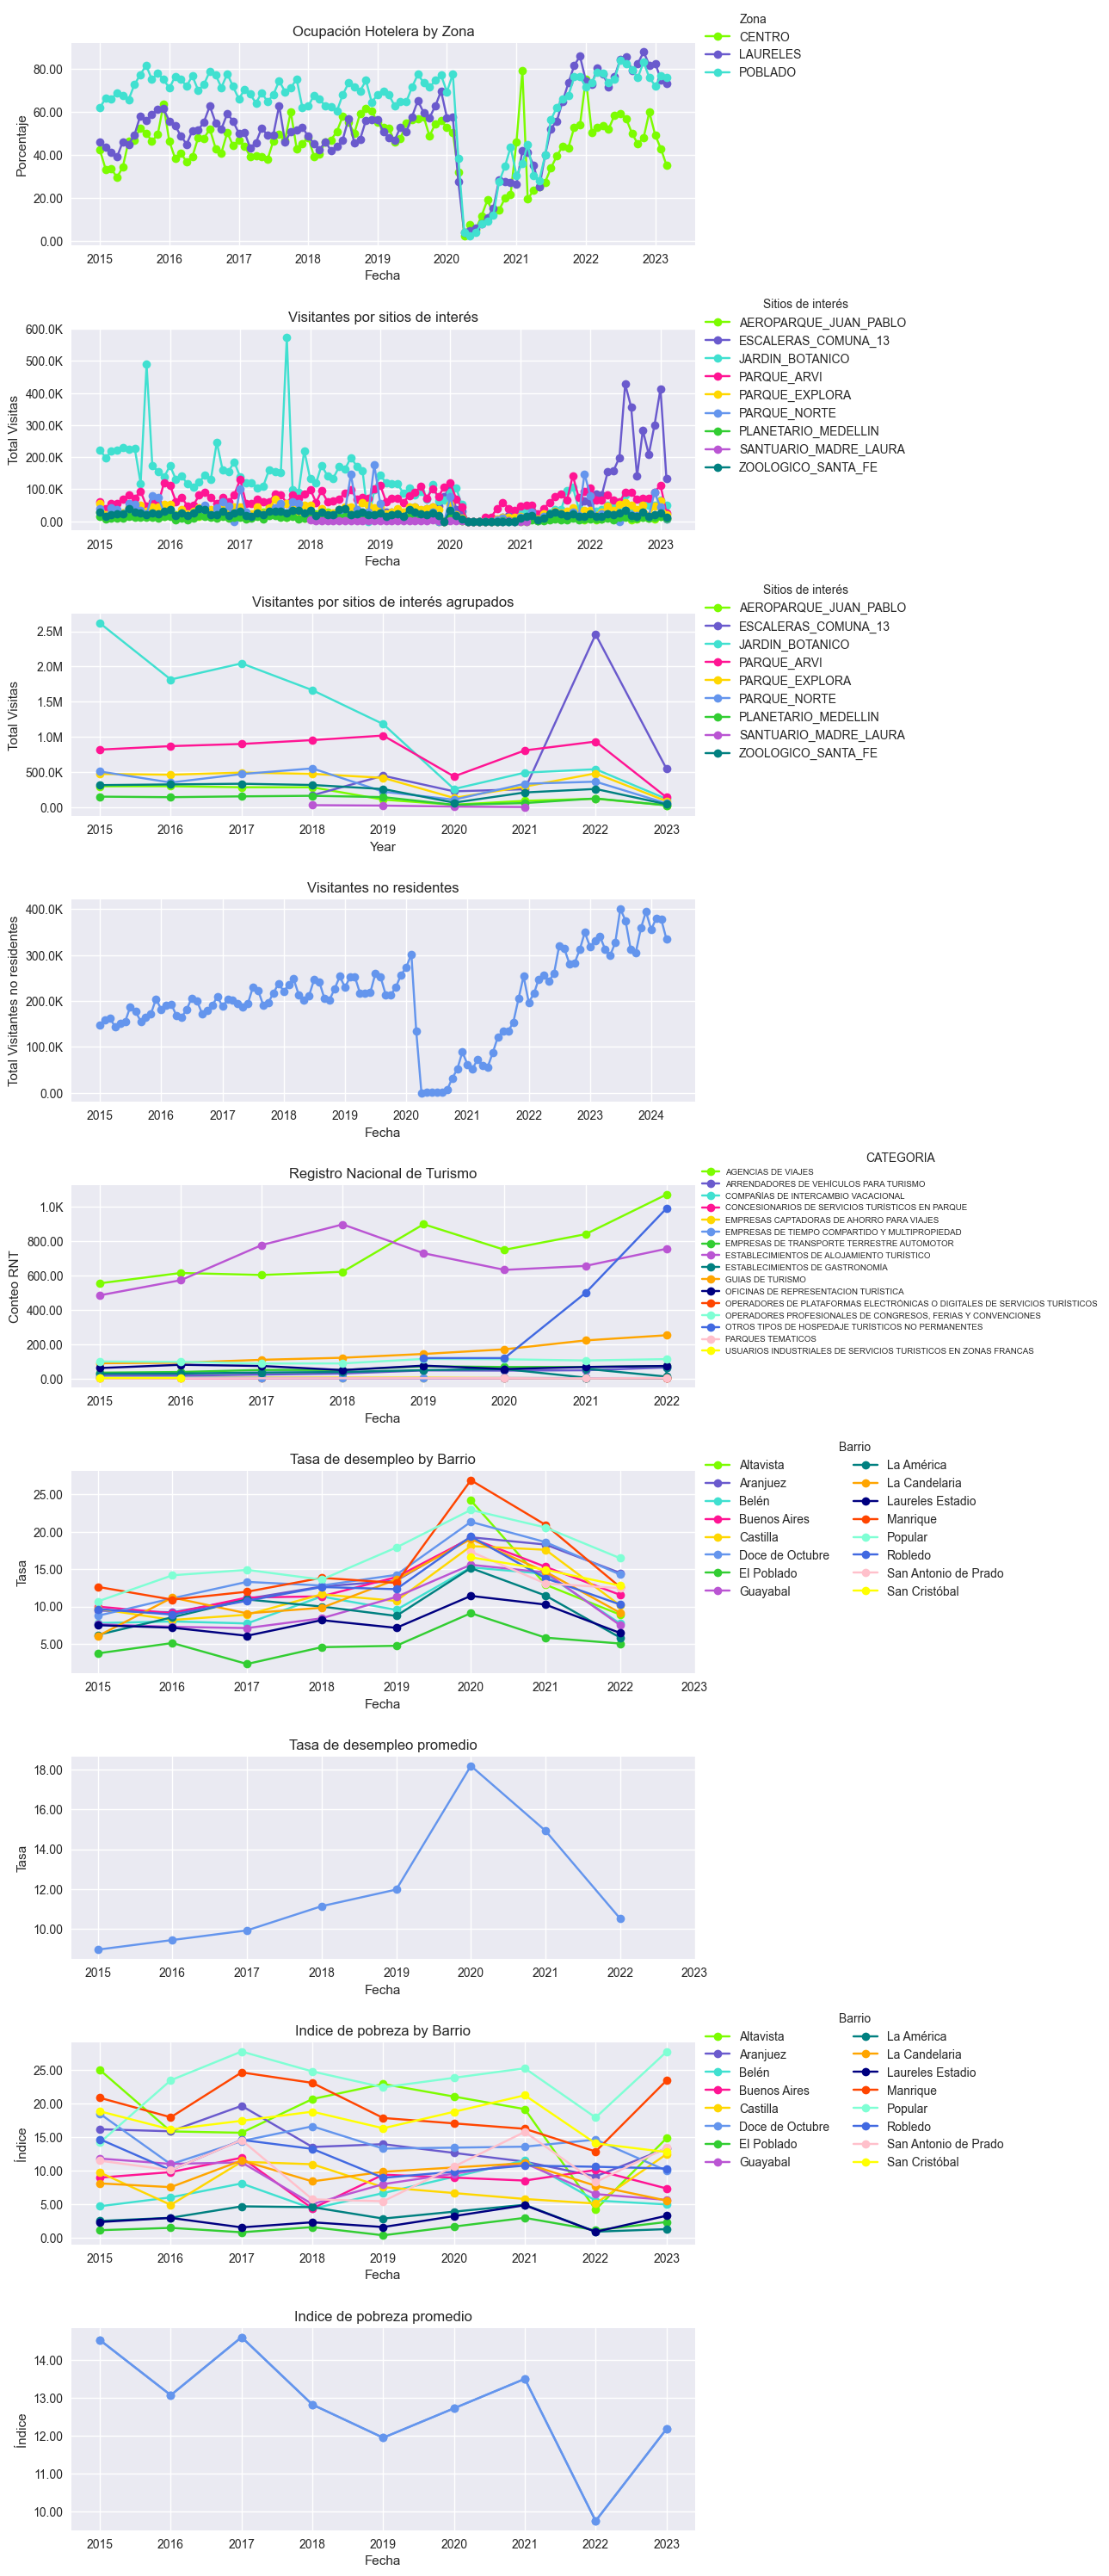

In [32]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(9, 1, figsize=(13, 30))

plot_time_series(
    ocupacion_hotelera,
    'date',
    'ocu_valor',
    'Ocupación Hotelera by Zona',
    'Fecha',
    'Porcentaje',
    'Zona',
    'ocu_zona',
    ax=axs[0]
)

plot_time_series(
    visitantes_sit_interes_all,
    'date',
    'sit_totalvisitas',
    'Visitantes por sitios de interés',
    'Fecha',
    'Total Visitas',
    'Sitios de interés',
    'sit_nombre',
    ax=axs[1]
)

plot_time_series(
    grouped_visitantes_sit_interes,
    'year',
    'sit_totalvisitas',
    'Visitantes por sitios de interés agrupados',
    'Year',
    'Total Visitas',
    'Sitios de interés',
    'sit_nombre',
    ax=axs[2]
)

plot_time_series(
    visitantes_extranjeros,
    'date',
    'Extranjeros no Residentes',
    'Visitantes no residentes',
    'Fecha',
    'Total Visitantes no residentes',
    None,
    ax=axs[3]
)

plot_time_series(
    rnt,
    'date',
    'Count_RNT',
    'Registro Nacional de Turismo',
    'Fecha',
    'Conteo RNT',
    'CATEGORIA',
    'CATEGORIA',
    ax=axs[4], fontsize = 7
)

plot_time_series_melt(tasa_desempleo,
    'Tasa de desempleo by Barrio',
    'Fecha',
    'Tasa',
    "Barrio",
    ax=axs[5], ncol = 2)

plot_time_series_melt_avg(tasa_desempleo,
    'Tasa de desempleo promedio',
    'Fecha',
    'Tasa',
    ax=axs[6])

plot_time_series_melt(indice_pobreza,
    'Indice de pobreza by Barrio',
    'Fecha',
    'Índice',
    "Barrio",
    ax=axs[7], ncol = 2)

plot_time_series_melt_avg(indice_pobreza,
    'Indice de pobreza promedio',
    'Fecha',
    'Índice',
    ax=axs[8])

plot_time_series_melt_avg(indice_pobreza,
    'Indice de pobreza promedio',
    'Fecha',
    'Índice',
    ax=axs[8])


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Merge

In [34]:
# Determine the minimum and maximum dates from the original DataFrames
min_date = ocupacion_hotelera['date'].min()
max_date = ocupacion_hotelera['date'].max()

# Create a complete date range from the minimum to the maximum date
complete_date_range = pd.date_range(start=min_date, end=max_date, freq='MS')
complete_year_month = pd.DataFrame({'date': complete_date_range})
complete_year_month['year'] = complete_year_month['date'].dt.year
complete_year_month['month'] = complete_year_month['date'].dt.month
complete_date = complete_year_month.drop(columns=['year','month'])

# Dataset by Year to Year-Month
rnt_year_month = complete_year_month.merge(rnt.drop(columns='date'),on='year', how= 'inner')

# Pivot the DataFrames
pivot_ocupacion_hotelera = pivot_df(ocupacion_hotelera,['year', 'month', 'date'], 'ocu_zona', 'ocu_valor', 'ocup_hotelera')
pivot_visitantes_sit_interes_all = pivot_df(visitantes_sit_interes_all,['year', 'month', 'date'], 'sit_nombre', 'sit_totalvisitas', 'sit_interes')
pivot_rnt_establecimientos = pivot_df(rnt_year_month,['year', 'date'], 'CATEGORIA', 'Count_RNT', 'rnt_establecimientos')
pivot_rnt_empleados = pivot_df(rnt_year_month,['year', 'date'], 'CATEGORIA', 'Sum_EMPLEADOS', 'rnt_empleados')
pivot_tasa_desempleo = pivot_df(tasa_desempleo,['year'], 'nombre', 'value', 'desempleo')
pivot_indice_pobreza = pivot_df(indice_pobreza,['year'], 'nombre', 'value', 'pobreza')

# Merge the year and month DataFrame with the complete date range
merged_df_ocupacion_hotelera = complete_date.merge(pivot_ocupacion_hotelera, on=['date'], how='left')
merged_df_sit_interes = merged_df_ocupacion_hotelera.merge(pivot_visitantes_sit_interes_all.drop(columns=['year', 'month']), on=['date'], how='outer')
merged_df_extranjeros = merged_df_sit_interes.merge(visitantes_extranjeros, on=['date'], how='outer', suffixes=('', '_extranjeros'))

# Merge the year DataFrame with the complete year and month DataFrame
merged_df_rnt_est = merged_df_extranjeros.merge(pivot_rnt_establecimientos.drop(columns=['year']), on='date', how='left', suffixes=('_merge', '_rnt_est'))
merged_df_rnt_emp = merged_df_rnt_est.merge(pivot_rnt_empleados.drop(columns=['year']), on='date', how='left', suffixes=('_merge', '_rnt_emp'))
merged_df_desempleo = merged_df_rnt_emp.merge(pivot_tasa_desempleo, on='year', how='left', suffixes=('_merge', '_desempleo'))
merged_df_pobreza = merged_df_desempleo.merge(pivot_indice_pobreza, on='year', how='left', suffixes=('_merge', '_pobreza'))


In [35]:
merged_df = merged_df_pobreza.drop(columns = ['year','month']).set_index('date').copy()

# Correlación de variables

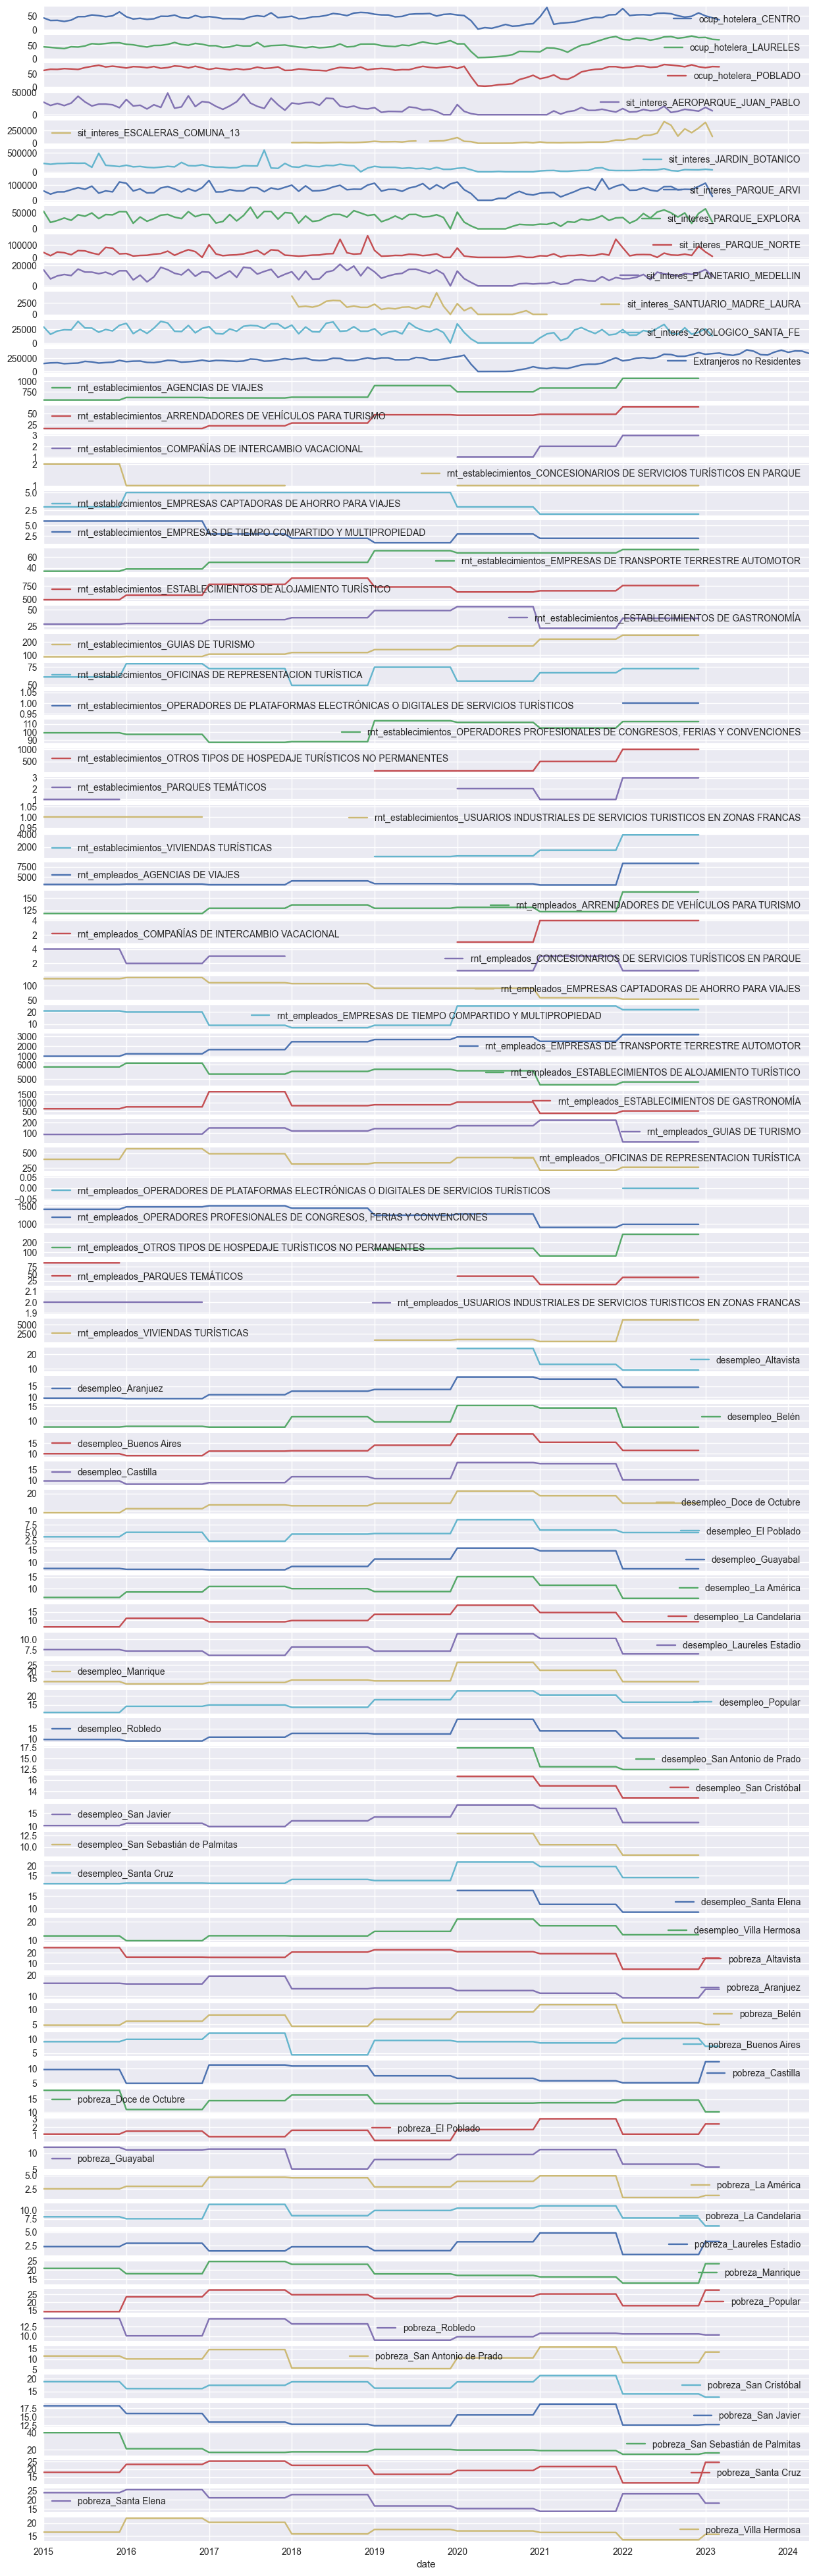

In [36]:
axes = merged_df.plot(subplots=True, figsize=(15, 50))

In [10]:
correlation_matrix = merged_df.corr()


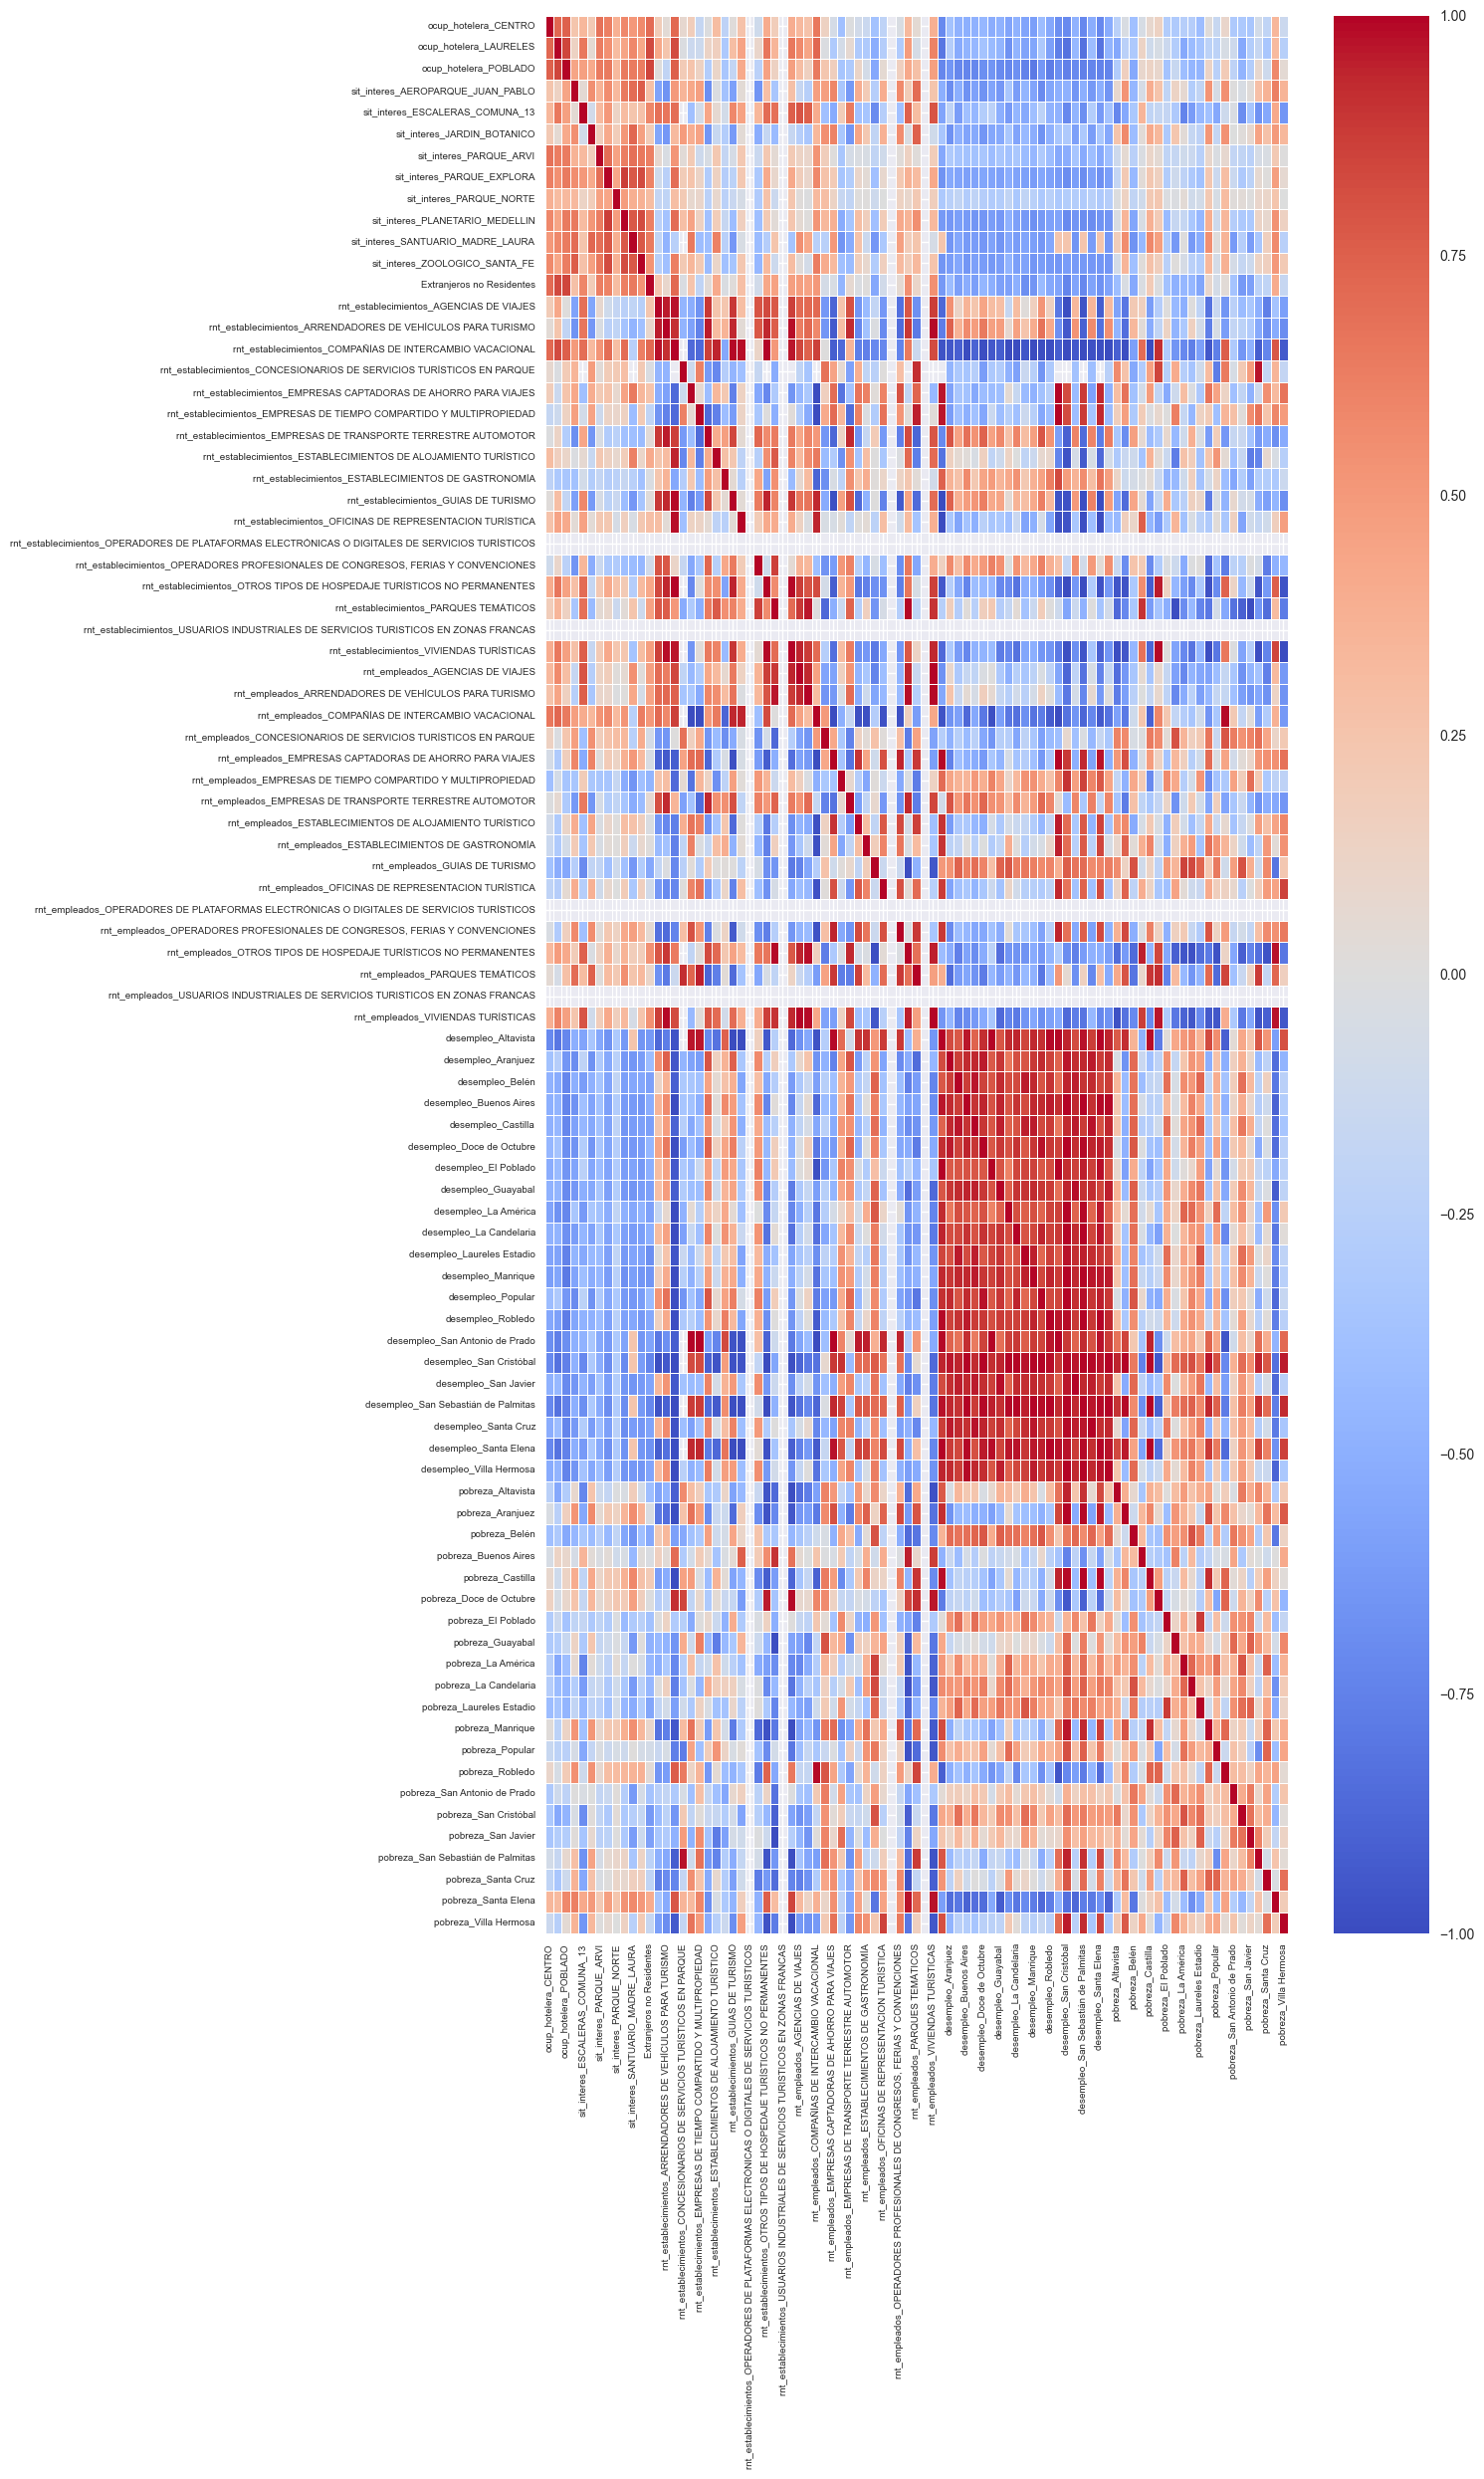

In [37]:
plt.figure(figsize=(15, 25))
ax = sns.heatmap(correlation_matrix,cmap='coolwarm', annot_kws={"size": 8}, linewidths=0.5, linecolor='white')

# Set the font size of the axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

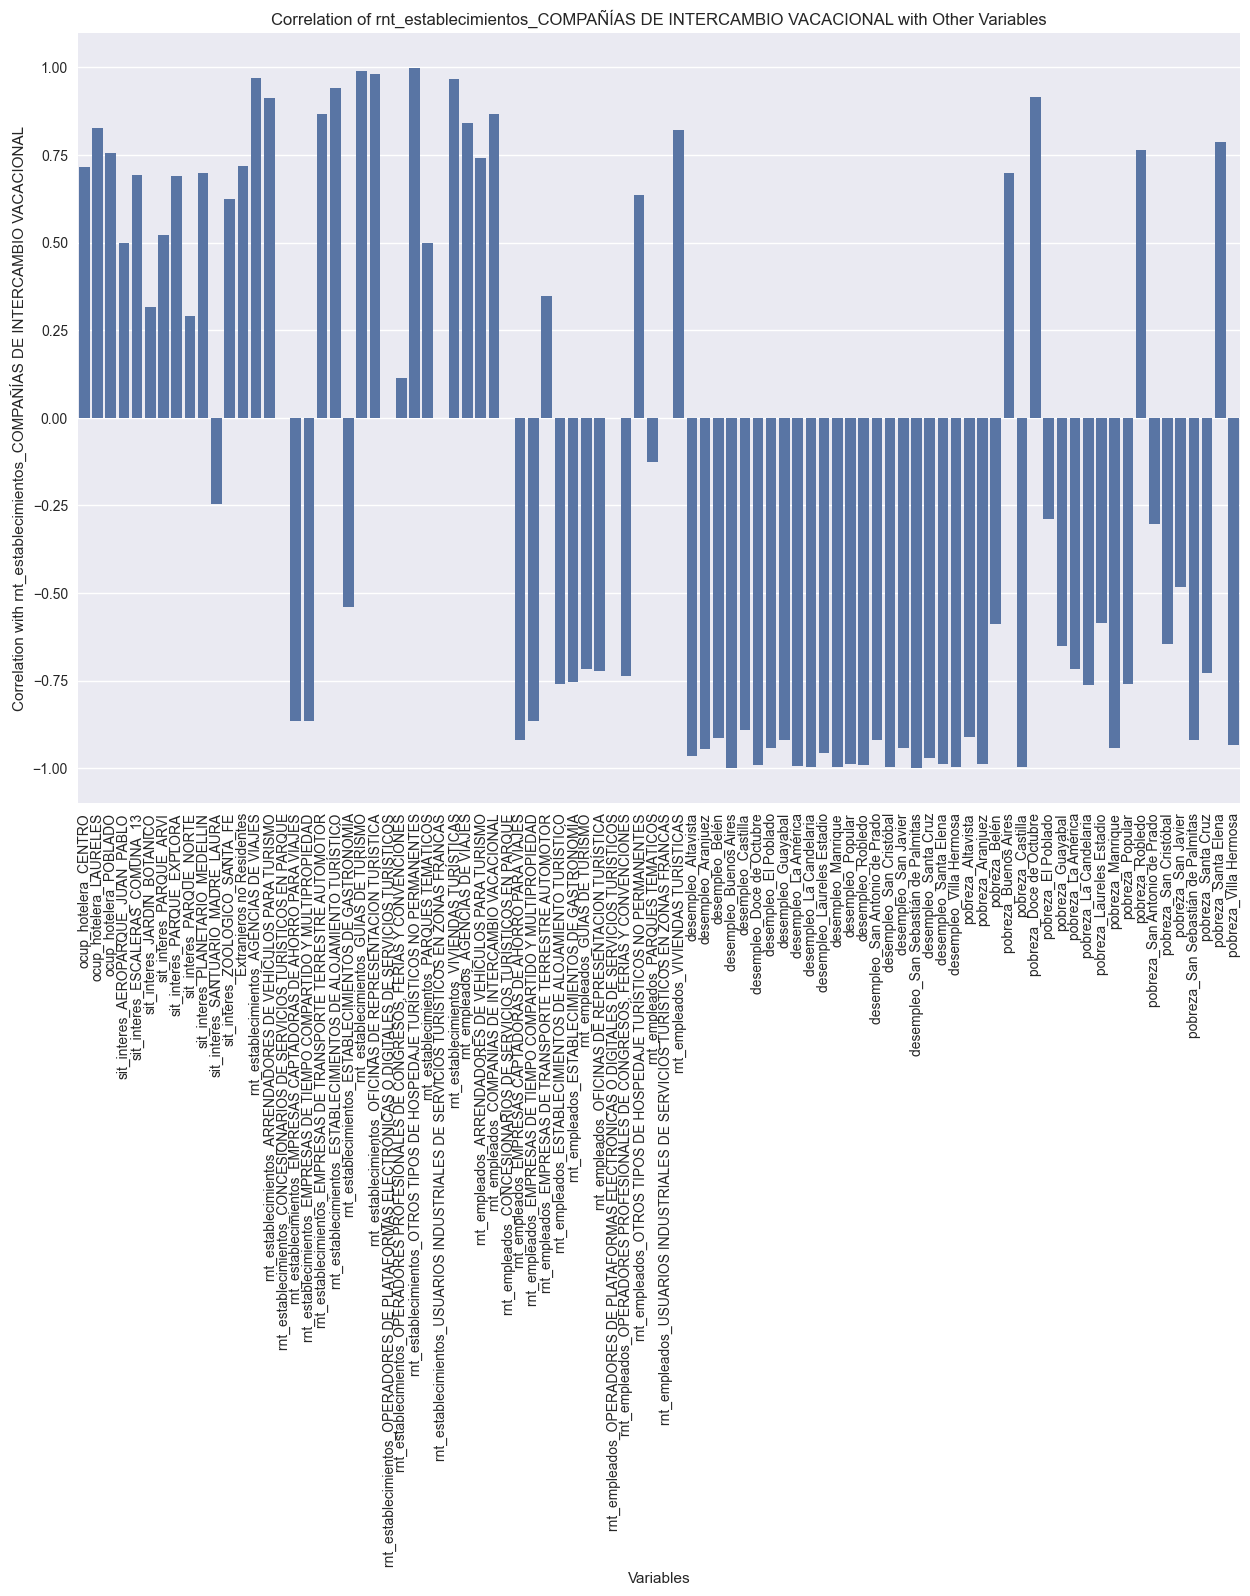

In [42]:
target_variable = 'rnt_establecimientos_COMPAÑÍAS DE INTERCAMBIO VACACIONAL'

# Extract the correlations of the target variable with all other variables
target_correlations = correlation_matrix[target_variable].drop(target_variable)

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation with {}'.format(target_variable))
plt.title('Correlation of {} with Other Variables'.format(target_variable))
plt.show()

In [12]:
rnt_complete = pd.read_csv(r"C:\Users\nata-\OneDrive\Datathon UN\Datasets\turistas-visitantes\Hist_rico_Registro_Nacional_de_Turismo_-_RNT_20241108.csv")

In [22]:
list_category = rnt_complete['CATEGORIA'].unique()
list_category.sort()

In [24]:
list_civ = ['COMPANIA DE INTERCAMBIO VACACIONAL',
       'COMPAÑÍA DE INTERCAMBIO VACACIONAL',
       'COMPAÑÍAS DE INTERCAMBIO VACACIONAL']

In [23]:
list_category

array(['AGENCIA DE VIAJES', 'AGENCIAS DE VIAJES',
       'ARRENDADORES DE VEHICULOS PARA TURISMO NACIONAL E INTERNACIONAL',
       'ARRENDADORES DE VEHÍCULOS PARA TURISMO NACIONAL E INTERNACIONAL',
       'BARES', 'COMPANIA DE INTERCAMBIO VACACIONAL',
       'COMPAÑÍA DE INTERCAMBIO VACACIONAL',
       'COMPAÑÍAS DE INTERCAMBIO VACACIONAL',
       'CONCESIONARIOS DE SERVICIOS TURISTICOS EN PARQUE',
       'CONCESIONARIOS DE SERVICIOS TURÍSTICOS EN PARQUE',
       'EMPRESA DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD',
       'EMPRESA DE TRANSPORTE TERRESTRE AUTOMOTOR',
       'EMPRESAS CAPTADORAS DE AHORRO PARA VIAJES',
       'EMPRESAS DE TIEMPO COMPARTIDO Y MULTIPROPIEDAD',
       'EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR',
       'ESTABLECIMIENTO DE GASTRONOMIA Y SIMILARES',
       'ESTABLECIMIENTO DE GASTRONOMÍA',
       'ESTABLECIMIENTO DE GASTRONOMÍA Y SIMILARES',
       'ESTABLECIMIENTOS DE ALOJAMIENTO TURISTICO',
       'ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO',
       'ESTABLECIM

In [26]:
rnt_complete[(rnt_complete['NOMBRE-MUNI'] == 'MEDELLIN') & (rnt_complete['ESTADO'] == 'ACTIVO') & (rnt_complete['CATEGORIA'].isin(list_civ))]

,AÑO,RNT,ESTADO,CATEGORIA,SUBCATEGORIA,NOMDEP,NOMBRE-MUNI,RAZON_SOCIAL,HABITACIONES,CAMAS,EMPLEADOS
328094,2020,88483,ACTIVO,COMPANIA DE INTERCAMBIO VACACIONAL,COMPANIA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,CALLE PEREZ TATIANA,0,0,1
362911,2021,88483,ACTIVO,COMPAÑÍA DE INTERCAMBIO VACACIONAL,COMPAÑÍA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,ALL TOURS COLOMBIA,0,0,1
366834,2021,93177,ACTIVO,COMPAÑÍA DE INTERCAMBIO VACACIONAL,COMPAÑÍA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,STUDY UNION INTERNATIONAL,0,0,3
413825,2022,88483,ACTIVO,COMPAÑÍAS DE INTERCAMBIO VACACIONAL,COMPAÑÍA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,CALLE PEREZ TATIANA,0,0,0
416717,2022,93177,ACTIVO,COMPAÑÍAS DE INTERCAMBIO VACACIONAL,COMPAÑÍA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,STUDY UNION INTERNATIONAL MEDELLIN S.A.S.,0,0,3
448340,2022,131448,ACTIVO,COMPAÑÍAS DE INTERCAMBIO VACACIONAL,COMPAÑÍA DE INTERCAMBIO VACACIONAL,ANTIOQUIA,MEDELLIN,LABFUSION SAS,0,0,1


In [140]:
# Define the threshold for high correlation
threshold = 0.7

# Create a mask to filter out the high correlation values (both positive and negative)
high_corr_mask = ((correlation_matrix > threshold) | (correlation_matrix < -threshold)) & (correlation_matrix < 1) & (correlation_matrix > -1)

# Create a list to store the variable pairs with high correlation
high_corr_pairs = []

# Iterate through the correlation matrix to find high correlation pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_corr_mask.iloc[i, j]:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append({'Variable1': var1, 'Variable2': var2, 'Correlation': corr_value})

# Convert the list to a DataFrame
high_corr_pairs_df = pd.DataFrame(high_corr_pairs)

# Sort the DataFrame by correlation value in descending order (absolute value)
high_corr_pairs_df = high_corr_pairs_df.sort_values(by='Correlation', key=abs, ascending=False)



In [141]:
high_corr_pairs_df[0:10]

,Variable1,Variable2,Correlation
383,desempleo_San Cristóbal,rnt_establecimientos_OTROS TIPOS DE HOSPEDAJE TURÍSTICOS NO PERMANENTES,-0.999999
352,desempleo_San Antonio de Prado,rnt_empleados_EMPRESAS CAPTADORAS DE AHORRO PARA VIAJES,0.999990
210,desempleo_Buenos Aires,rnt_establecimientos_COMPAÑÍAS DE INTERCAMBIO VACACIONAL,-0.999986
503,desempleo_Santa Elena,rnt_establecimientos_GUIAS DE TURISMO,-0.999983
403,desempleo_San Cristóbal,desempleo_La Candelaria,0.999980
553,desempleo_Villa Hermosa,desempleo_San Cristóbal,0.999911
457,desempleo_San Sebastián de Palmitas,desempleo_Buenos Aires,0.999798
405,desempleo_San Cristóbal,desempleo_Manrique,0.999757
435,desempleo_San Sebastián de Palmitas,rnt_establecimientos_COMPAÑÍAS DE INTERCAMBIO VACACIONAL,-0.999677
529,desempleo_Santa Elena,desempleo_Robledo,0.999580


In [142]:
# Function to extract the dataset name
def extract_dataset_name(variable):
    return variable.split('_')[0]

# Apply the function to each column and create new columns
high_corr_pairs_df['dataset_name1'] = high_corr_pairs_df['Variable1'].apply(extract_dataset_name)
high_corr_pairs_df['dataset_name2'] = high_corr_pairs_df['Variable2'].apply(extract_dataset_name)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [144]:
high_corr_pairs_df[0:10]

,Variable1,Variable2,Correlation,dataset_name1,dataset_name2
383,desempleo_San Cristóbal,rnt_establecimientos_OTROS TIPOS DE HOSPEDAJE TURÍSTICOS NO PERMANENTES,-0.999999,desempleo,rnt
352,desempleo_San Antonio de Prado,rnt_empleados_EMPRESAS CAPTADORAS DE AHORRO PARA VIAJES,0.999990,desempleo,rnt
210,desempleo_Buenos Aires,rnt_establecimientos_COMPAÑÍAS DE INTERCAMBIO VACACIONAL,-0.999986,desempleo,rnt
503,desempleo_Santa Elena,rnt_establecimientos_GUIAS DE TURISMO,-0.999983,desempleo,rnt
403,desempleo_San Cristóbal,desempleo_La Candelaria,0.999980,desempleo,desempleo
553,desempleo_Villa Hermosa,desempleo_San Cristóbal,0.999911,desempleo,desempleo
457,desempleo_San Sebastián de Palmitas,desempleo_Buenos Aires,0.999798,desempleo,desempleo
405,desempleo_San Cristóbal,desempleo_Manrique,0.999757,desempleo,desempleo
435,desempleo_San Sebastián de Palmitas,rnt_establecimientos_COMPAÑÍAS DE INTERCAMBIO VACACIONAL,-0.999677,desempleo,rnt
529,desempleo_Santa Elena,desempleo_Robledo,0.999580,desempleo,desempleo


In [145]:
# Function to create a sorted pair
def create_sorted_pair(row):
    return '_'.join(sorted([row['dataset_name1'], row['dataset_name2']]))

# Create a new column that combines the sorted dataset names
high_corr_pairs_df['dataset_pair'] = high_corr_pairs_df.apply(create_sorted_pair, axis=1)

# Get the frequency of each pair
pair_frequency = high_corr_pairs_df['dataset_pair'].value_counts().reset_index()
pair_frequency.columns = ['dataset_pair', 'frequency']


In [146]:
pair_frequency

,dataset_pair,frequency
0,desempleo_desempleo,205
1,desempleo_rnt,154
2,rnt_rnt,144
3,pobreza_rnt,131
4,desempleo_pobreza,78
5,desempleo_ocup,24
6,pobreza_pobreza,17
7,sit_sit,8
8,rnt_sit,8
9,ocup_rnt,4


In [ ]:
pobreza_sit

In [ ]:
high_corr_pairs_df[high_corr_pairs_df['dataset_pair'] == 'pobreza_sit']

,Variable1,Variable2,Correlation,dataset_name1,dataset_name2,dataset_pair
639,pobreza_La América,sit_interes_ESCALERAS_COMUNA_13,-0.741912,pobreza,sit,pobreza_sit
558,pobreza_Altavista,sit_interes_ESCALERAS_COMUNA_13,-0.722182,pobreza,sit,pobreza_sit


In [151]:
high_corr_pairs_df[high_corr_pairs_df['dataset_pair'] == 'desempleo_ocup']

,Variable1,Variable2,Correlation,dataset_name1,dataset_name2,dataset_pair
430,desempleo_San Sebastián de Palmitas,ocup_hotelera_LAURELES,-0.827892,desempleo,ocup,desempleo_ocup
369,desempleo_San Cristóbal,ocup_hotelera_LAURELES,-0.824722,desempleo,ocup,desempleo_ocup
494,desempleo_Santa Elena,ocup_hotelera_LAURELES,-0.819353,desempleo,ocup,desempleo_ocup
172,desempleo_Altavista,ocup_hotelera_LAURELES,-0.801807,desempleo,ocup,desempleo_ocup
293,desempleo_Manrique,ocup_hotelera_POBLADO,-0.786357,desempleo,ocup,desempleo_ocup
324,desempleo_Robledo,ocup_hotelera_POBLADO,-0.766454,desempleo,ocup,desempleo_ocup
340,desempleo_San Antonio de Prado,ocup_hotelera_LAURELES,-0.765348,desempleo,ocup,desempleo_ocup
370,desempleo_San Cristóbal,ocup_hotelera_POBLADO,-0.756008,desempleo,ocup,desempleo_ocup
431,desempleo_San Sebastián de Palmitas,ocup_hotelera_POBLADO,-0.755397,desempleo,ocup,desempleo_ocup
281,desempleo_Laureles Estadio,ocup_hotelera_POBLADO,-0.745668,desempleo,ocup,desempleo_ocup
